<a href="https://colab.research.google.com/github/KaviyaKannan14/Data-Engineering-ML-projects/blob/main/Windows_Laptop_Ratings_for_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install catboost




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 7.2 MB/s eta 0:00:00


In [5]:
!pip install feature-engine


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 6.4 MB/s eta 0:00:00


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from feature_engine.encoding import OneHotEncoder



In [7]:
data_path = '/content/best_buy_laptops_2024.csv'  # Adjust the path as needed
laptops = pd.read_csv(data_path)
laptops = laptops.rename(columns={
    'aggregateRating/ratingValue': 'Rating',
    'aggregateRating/reviewCount': 'ReviewCount',
    'offers/price': 'Price',
    'offers/priceCurrency': 'Currency'
})

In [8]:
laptops.drop_duplicates(inplace=True)
laptops.dropna(subset=['Rating', 'Price'], inplace=True)

In [9]:
laptops['Size'] = laptops['depth'].fillna(0) * laptops['width'].fillna(0)

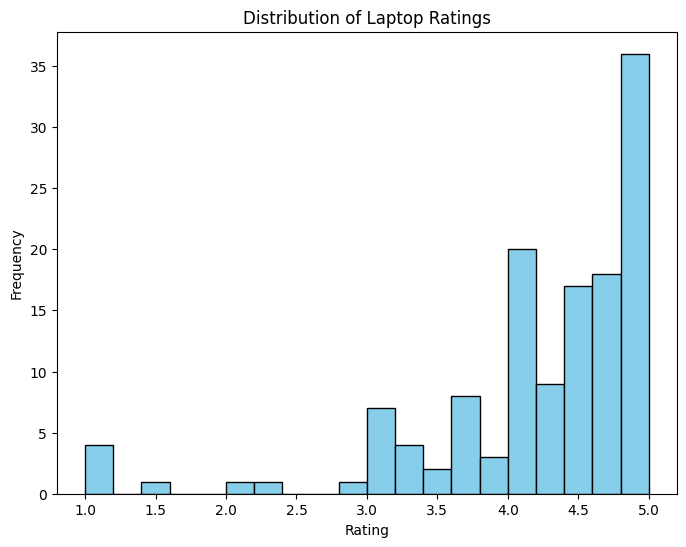

In [10]:
# Custom histogram for laptop ratings
plt.figure(figsize=(8, 6))
plt.hist(laptops['Rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Laptop Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


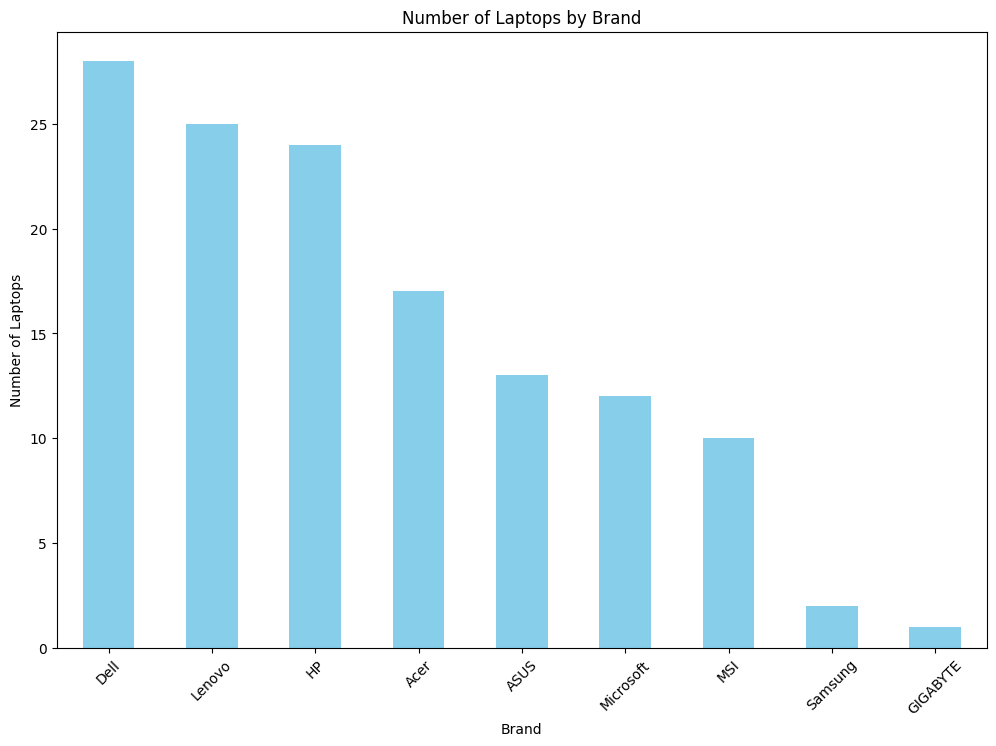

In [15]:
laptops_encoded = pd.get_dummies(laptops[['brand', 'Price', 'Size', 'Rating']], columns=['brand'], drop_first=True)

# Brand Distribution Visualization
plt.figure(figsize=(12, 8))
laptops['brand'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Laptops by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Laptops')
plt.xticks(rotation=45)
plt.show()


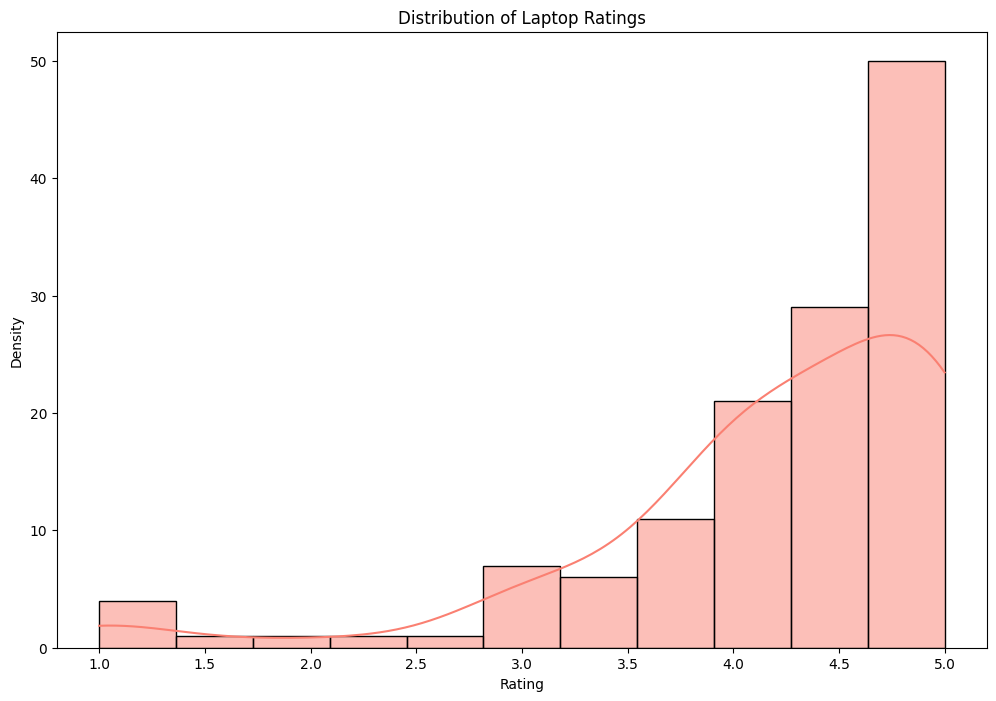

In [16]:
# Rating Distribution Visualization
plt.figure(figsize=(12, 8))
sns.histplot(laptops['Rating'], kde=True, color='salmon')
plt.title('Distribution of Laptop Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()


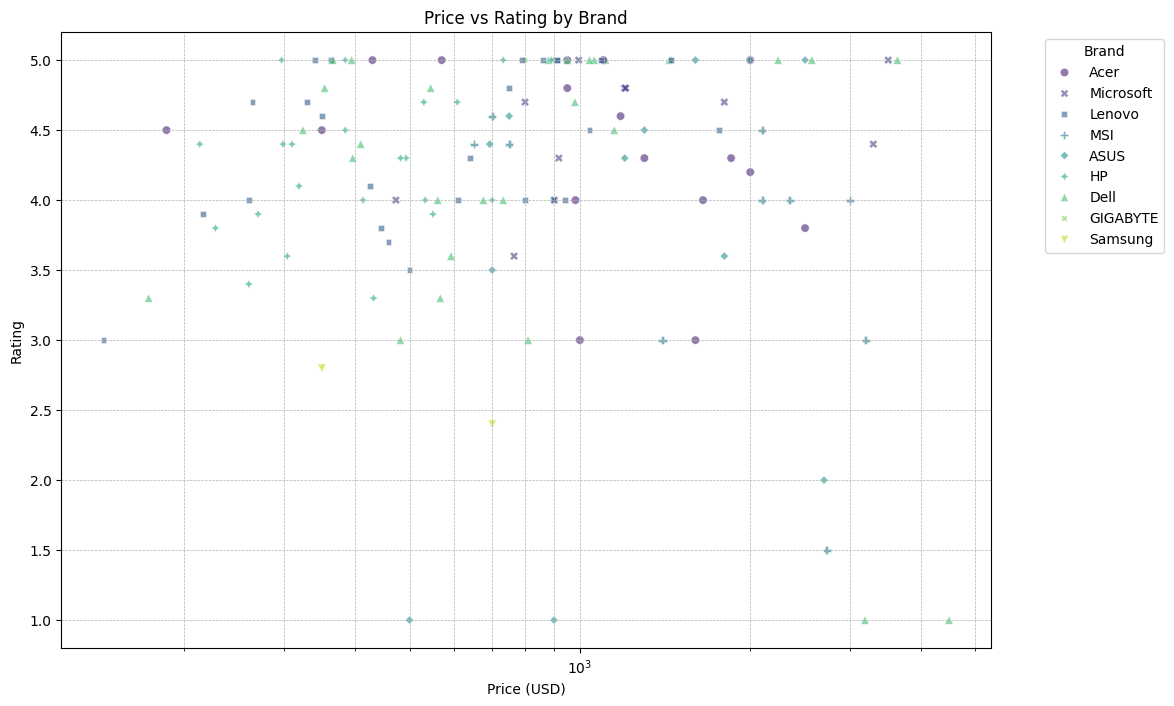

In [17]:
# Price vs Rating Scatter Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=laptops, x='Price', y='Rating', hue='brand', style='brand', palette='viridis', alpha=0.6)
plt.title('Price vs Rating by Brand')
plt.xlabel('Price (USD)')
plt.ylabel('Rating')
plt.xscale('log')  # Using log scale for price for better readability
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


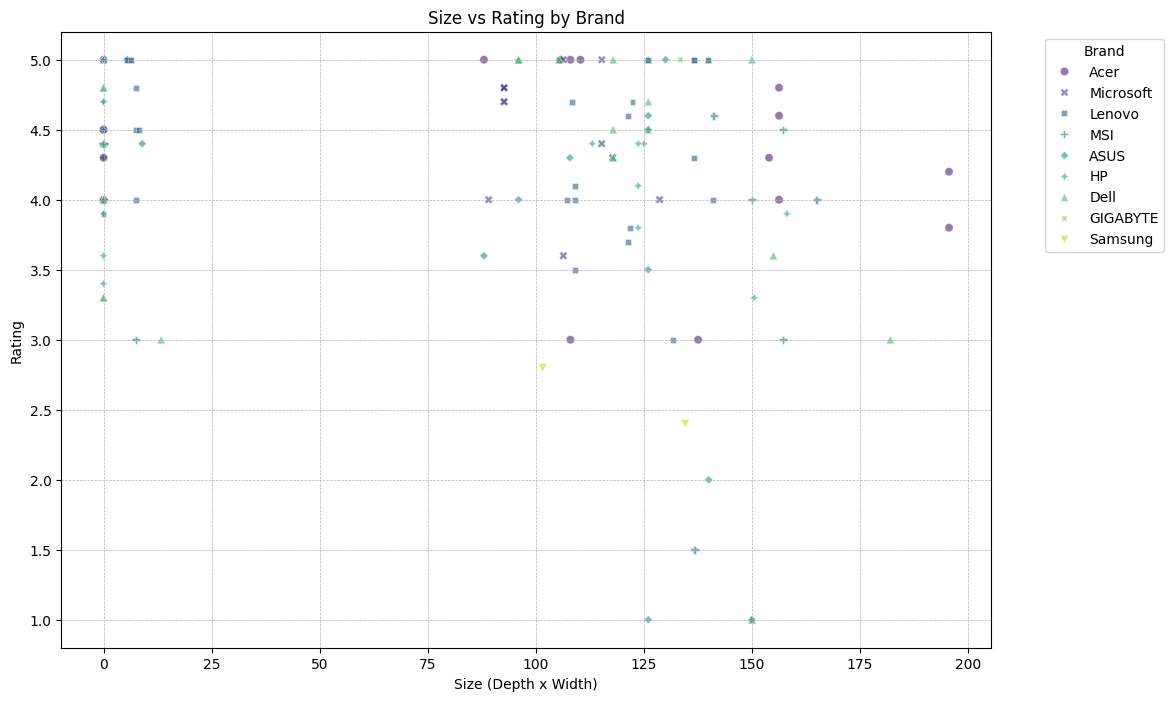

In [18]:
# Size vs Rating Scatter Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=laptops, x='Size', y='Rating', hue='brand', style='brand', palette='viridis', alpha=0.6)
plt.title('Size vs Rating by Brand')
plt.xlabel('Size (Depth x Width)')
plt.ylabel('Rating')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [12]:
# Feature selection with one-hot encoding for categorical variables
encoder = OneHotEncoder(variables=['brand'], drop_last=True)
laptops_encoded = encoder.fit_transform(laptops[['brand', 'Price', 'Size', 'Rating']])

# Preparing the data
X = laptops_encoded.drop('Rating', axis=1)
y = laptops_encoded['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model training with CatBoost
model = CatBoostRegressor(verbose=0, learning_rate=0.03, depth=6, iterations=1000)
model.fit(X_train, y_train)

# Model evaluation
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f'Training RMSE: {rmse_train:.3f}')
print(f'Test RMSE: {rmse_test:.3f}')


Training RMSE: 0.132
Test RMSE: 0.996
